In [ ]:
# (1) install + import GetOldTweets3 + Pandas
# (2) define tweet scraping function | https://towardsdatascience.com/how-to-scrape-tweets-from-twitter-59287e20f0f1
# (3) scrape twitter + store tweets to .csv files for each search term
# (4) merge .csv files + drop duplicates
# (5) clean final CSV | (a) separate #'s by column + (b) convert relevant data to strings
# (5) inspect data | identify features
# (6) Visualize features
# (7) GLM // Feature exploration

In [1]:
#build the dataset 

import GetOldTweets3 as got
import pandas as pd

In [2]:

# Parameters: (text query you want to search), (max number of most recent tweets to pull from)
def text_query_to_csv(text_query, count):
    # Creation of query object
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(text_query)\
                                                .setMaxTweets(count)\
                                            .setSince("2020-04-01")\
                                        .setUntil("2020-06-10")\
                                    .setEmoji("unicode")
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)

    # Creating list of chosen tweet data
    text_tweets = [[
        tweet.id, #(str)
        tweet.permalink, #(str)
        tweet.username, #(str)
        tweet.to, #(str)
        tweet.retweets, #(int)
        tweet.favorites, #(int)
        tweet.mentions, #(str)
        tweet.hashtags, #(str)
        tweet.geo, #(str)
        tweet.date, #(datetime) in UTC
        tweet.text #(str)
    ] for tweet in tweets]

    # Creation of dataframe from tweets
    tweets_df = pd.DataFrame(text_tweets, columns = [
        'id',
        'permalink', 
        'username',
        'to',
        'retweets',
        'favorites',
        'mentions', 
        'hashtags',
        'geo', 
        'date',
        'text'
    ])

    # Converting tweets dataframe to csv file
    tweets_df.to_csv('{}-{}k-tweets.csv'.format(text_query, int(count/1000)), sep=',')

In [4]:
# Input search query to scrape tweets and name csv file
# Max recent tweets pulls x amount of most recent tweets matching search terms
text_query = '#5Gcoronavirus' or '5Gcoronavirus'
count = 25000 #<- no count = pulls every available tweet between defined function range

# Calling function to query X amount of relevant tweets and create a CSV file
text_query_to_csv(text_query, count)

In [5]:
text_query = '#stop5G' or 'stop5G'

text_query_to_csv(text_query, count)

In [6]:
text_query = '#5Gdangers' or '5Gdangers'

text_query_to_csv(text_query, count)

In [7]:
text_query = '#5Gconspiracy' or '5Gconspiracy'

text_query_to_csv(text_query, count)

In [8]:
text_query = '#5Gtruth' or '5Gtruth'

text_query_to_csv(text_query, count)

In [9]:
text_query = '#5Gtowers' or '5Gtowers'

text_query_to_csv(text_query, count)

In [10]:
text_query = '#5Gkills' or '5Gkills'

text_query_to_csv(text_query, count)

In [11]:
text_query = '#5Gcanada' or '5Gcanada'

text_query_to_csv(text_query, count)

In [12]:
text_query = '#nohuawei' or 'nohuawei'

text_query_to_csv(text_query, count)

In [13]:
text_query = '#no5G' or 'no5G'

text_query_to_csv(text_query, count)

In [14]:
text_query = '#5Gvirus' or '5Gvirus'
count = 25000

text_query_to_csv(text_query, count)

In [15]:
text_query = '#saynoto5G' or 'saynoto5G'
count = 25000

text_query_to_csv(text_query, count)

In [ ]:
# merge CSV files && drop duplicates

    # https://stackoverflow.com/questions/38172215/join-two-csv-files-with-pandas-python-without-duplicates

In [16]:
# import pandas as pd

df1=pd.read_csv("#5Gcoronavirus-25k-tweets.csv")
df2=pd.read_csv("#stop5G-25k-tweets.csv")
df3=pd.read_csv("#5Gdangers-25k-tweets.csv")
df4=pd.read_csv("#5Gconspiracy-25k-tweets.csv")
df5=pd.read_csv("#5Gtruth-25k-tweets.csv")
df6=pd.read_csv("#5Gtowers-25k-tweets.csv")
df7=pd.read_csv("#5Gkills-25k-tweets.csv")
df8=pd.read_csv("#5Gcanada-25k-tweets.csv")
df9=pd.read_csv("#nohuawei-25k-tweets.csv")
df10=pd.read_csv("#no5G-25k-tweets.csv")
df11=pd.read_csv("#5Gvirus-25k-tweets.csv")
df12=pd.read_csv("#saynoto5G-25k-tweets.csv")

df_final=pd.concat([df1,
                    df2,
                    df3,
                    df4,
                    df5,
                    df6,
                    df7,
                    df8,
                    df9,
                    df10,
                    df11,
                    df12
                   ]).drop_duplicates(subset=[
    'id',
    'permalink', 
    'username',
    'to',
    'retweets',
    'favorites',
    'mentions', 
    'hashtags',
    'geo', 
    'date',
    'text'
]).reset_index(drop=True)

print(df_final.shape)

df_final2=df_final.drop_duplicates(subset=[    
    'id',
    'permalink', 
    'username',
    'to',
    'retweets',
    'favorites',
    'mentions', 
    'hashtags',
    'geo', 
    'date',
    'text'
]).reset_index(drop=True)

df_final2.to_csv('final.csv', index=False)

(26582, 12)


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df = pd.read_csv("final.csv")
df.dropna()

,Unnamed: 0,id,permalink,username,to,retweets,favorites,mentions,hashtags,geo,date,text


In [19]:
df.head()

,Unnamed: 0,id,permalink,username,to,retweets,favorites,mentions,hashtags,geo,date,text
0,0,1270476287912665088,https://twitter.com/No_Democrats/status/127047...,No_Democrats,NaN,0,0,@realDonaldTrump @cspanwj,#news #facebook #BREAKING #BreakingNews #5GCor...,NaN,2020-06-09 22:02:06+00:00,Stand Up: The Level Playing Field https://yout...
1,1,1270457391469993984,https://twitter.com/MAK7PIA/status/12704573914...,MAK7PIA,Huawei,0,0,NaN,#5GCoronavirus #SatanicSystem #WakeUp #5GCoron...,NaN,2020-06-09 20:47:00+00:00,#5GCoronavirus #SatanicSystem #WakeUp #5GCoron...
2,2,1270366943074189313,https://twitter.com/lena76300134/status/127036...,lena76300134,AnitaJimen,0,0,NaN,#Huawei #a #5GCoronavirus #5Gradiofrecuencia,NaN,2020-06-09 14:47:36+00:00,No te vayas!; Yo solo me iré cuando hayan gana...
3,3,1270349913138827266,https://twitter.com/Swildee/status/12703499131...,Swildee,NaN,0,0,@drbobgill @strandpublishuk @stand_upX @BigNar...,#StopCovid #stop5g #stop5gnow #5g #5GCoronavir...,NaN,2020-06-09 13:39:55+00:00,#StopCovid #stop5g #stop5gnow #5g #5GCoronavir...
4,4,1270348857747144705,https://twitter.com/starryknight776/status/127...,starryknight776,NaN,0,0,NaN,#stop5g #stop5gnow #5g #5GCoronavirus #5gcrisi...,NaN,2020-06-09 13:35:44+00:00,#stop5g #stop5gnow #5g #5GCoronavirus #5gcrisi...


In [28]:
#Use the .str string accessor to perform string operations on DataFrames. In particular, you want .str.len:

df['text_length']  = df['text'].str.len()

text_length = df.groupby('text_length')['retweets'].sum().sort_values()

In [29]:
hashtag_frequency = df.groupby('hashtags')['text_length'].sum().sort_values()

In [30]:
hashtag_frequency.head()

hashtags
#noHuawei       9
#5gcanada       9
#Saynoto5g     10
#No5g          11
#No5G #noAI    11
Name: text_length, dtype: int64

In [31]:
# plt.figure(figsize=(6,10))
# plt.barh(hashtag_frequency.index, hashtag_frequency)

In [32]:
df['hashtag_length'] = df['hashtags'].str.len()

In [33]:
df['hashtags'].nunique()

14483

In [34]:
df['hashtag_length'].value_counts()

14.0     2732
7.0      1035
8.0       971
18.0      756
23.0      631
         ... 
296.0       1
281.0       1
285.0       1
314.0       1
282.0       1
Name: hashtag_length, Length: 286, dtype: int64

In [35]:
text_length.head()

text_length
5      0
443    0
432    0
417    0
414    0
Name: retweets, dtype: int64

In [37]:
hashtag_size = df.groupby('retweets')['hashtag_length'].sum().sort_values()

In [38]:
hashtag_size.head()

retweets
72     5.0
151    5.0
680    7.0
109    7.0
137    7.0
Name: hashtag_length, dtype: float64

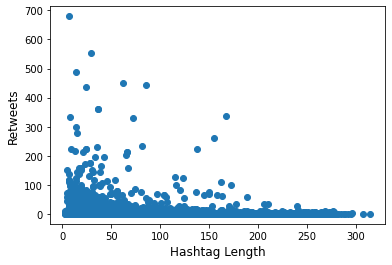

In [39]:
plt.figure()
plt.scatter(df['hashtag_length'],df['retweets'])
plt.xlabel('Hashtag Length', size=12)
plt.ylabel('Retweets', size=12)

#plt.xlim(0, 200)
#plt.ylim(0, 20)

plt.show()

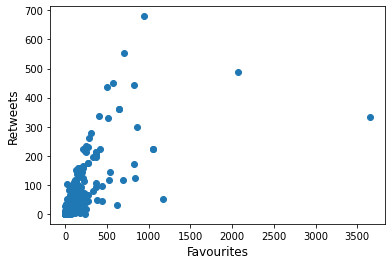

In [45]:
plt.figure()
plt.scatter(df['favorites'],df['retweets'])
plt.xlabel('Favourites', size=12)
plt.ylabel('Retweets', size=12)

#plt.ylim(0, 20)

plt.show()

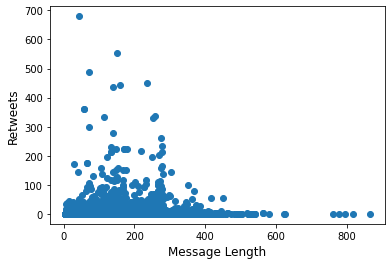

In [41]:
plt.figure()
plt.scatter(df['text_length'],df['retweets'])
plt.xlabel('Message Length', size=12)
plt.ylabel('Retweets', size=12)

#plt.xlim(0, 500)
#plt.ylim(0, 300)

plt.show()

In [46]:
df.dropna()
df['hashtag_length'] = df['hashtag_length'].fillna(0)

In [47]:
df.head()

,Unnamed: 0,id,permalink,username,to,retweets,favorites,mentions,hashtags,geo,date,text,text_length,hashtag_length
0,0,1270476287912665088,https://twitter.com/No_Democrats/status/127047...,No_Democrats,NaN,0,0,@realDonaldTrump @cspanwj,#news #facebook #BREAKING #BreakingNews #5GCor...,NaN,2020-06-09 22:02:06+00:00,Stand Up: The Level Playing Field https://yout...,281,154.0
1,1,1270457391469993984,https://twitter.com/MAK7PIA/status/12704573914...,MAK7PIA,Huawei,0,0,NaN,#5GCoronavirus #SatanicSystem #WakeUp #5GCoron...,NaN,2020-06-09 20:47:00+00:00,#5GCoronavirus #SatanicSystem #WakeUp #5GCoron...,51,51.0
2,2,1270366943074189313,https://twitter.com/lena76300134/status/127036...,lena76300134,AnitaJimen,0,0,NaN,#Huawei #a #5GCoronavirus #5Gradiofrecuencia,NaN,2020-06-09 14:47:36+00:00,No te vayas!; Yo solo me iré cuando hayan gana...,195,44.0
3,3,1270349913138827266,https://twitter.com/Swildee/status/12703499131...,Swildee,NaN,0,0,@drbobgill @strandpublishuk @stand_upX @BigNar...,#StopCovid #stop5g #stop5gnow #5g #5GCoronavir...,NaN,2020-06-09 13:39:55+00:00,#StopCovid #stop5g #stop5gnow #5g #5GCoronavir...,231,176.0
4,4,1270348857747144705,https://twitter.com/starryknight776/status/127...,starryknight776,NaN,0,0,NaN,#stop5g #stop5gnow #5g #5GCoronavirus #5gcrisi...,NaN,2020-06-09 13:35:44+00:00,#stop5g #stop5gnow #5g #5GCoronavirus #5gcrisi...,214,214.0


In [48]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pd.options.display.max_columns=500

import sklearn as sk
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection, preprocessing

In [49]:
features_to_include = [
    'favorites',
    'text_length',
    'hashtag_length'
]

In [50]:
feature_importances = feature_selection.mutual_info_regression(df[features_to_include],df['retweets'])

In [51]:
feat_importance_df = pd.DataFrame(list(zip(features_to_include,feature_importances)), columns=['feature','importance'])

In [52]:
feat_importance_df.sort_values(by='importance', ascending=False, inplace=True)

In [53]:
top_feats = [x for x in feat_importance_df['feature'][0:5]]
top_feats

['favorites', 'hashtag_length', 'text_length']

In [54]:
feat_importance_df.head()

,feature,importance
0,favorites,0.353107
2,hashtag_length,0.013197
1,text_length,0.011455


In [73]:
reg = sk.linear_model.LinearRegression()

In [74]:
regfit = reg.fit(df[top_feats], df['retweets'])

In [75]:
regfit.score(df[top_feats], df['retweets'])

0.5257623764493244

In [76]:
y_fit = regfit.predict(df[top_feats])

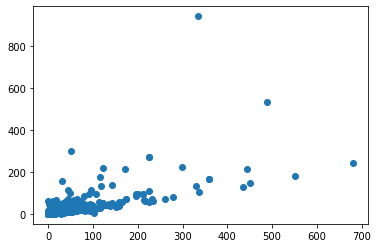

In [77]:
plt.scatter(df['retweets'], y_fit)

#plt.xlim(0, 30)
#plt.ylim(0, 50)


In [78]:
RidgeReg = sk.linear_model.Ridge(alpha=5000)

In [79]:
RidgeReg.fit(df[top_feats],df['retweets'])

Ridge(alpha=5000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [80]:
max(RidgeReg.coef_)

0.2583376398608169

In [81]:
max(regfit.coef_) # notice the max coefficient size is squashed from the OLS model

0.2583751012332214

In [88]:
from sklearn.model_selection import train_test_split

#Split the data so the train set contains 60% of the points. Ignore random_state.
split = 0.4

X_trn, X_tst, Y_trn, Y_tst = train_test_split(df[top_feats], df['retweets'], test_size=split, random_state=42)

In [89]:
#Create the model and fit it to the TRAIN SET
linear_regression_model = sk.linear_model.LinearRegression()
model = linear_regression_model.fit(X_trn, Y_trn)

#Evaluate the model on each set
print("The R2 score on the training set:", model.score(X_trn, Y_trn))
print("The R2 score on the testing set:", model.score(X_tst, Y_tst))

The R2 score on the training set: 0.6866549902155998
The R2 score on the testing set: 0.24637485074759602


In [90]:
from sklearn.externals import joblib
joblib.dump(regfit, 'my_linear_model.pkl') 

['my_linear_model.pkl']

In [85]:
my_new_linear_model = joblib.load('my_linear_model.pkl') 